# Convolutional NN

In [17]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from si.data import Dataset
from si.util import to_categorical

Load the MNIST dataset

In [18]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [19]:
train,test = load_mnist(500)

In [20]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.y = to_categorical(train.y)

In [21]:
preprocess(train)
preprocess(test)

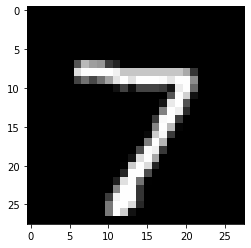

In [22]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [23]:
from si.supervised import NN, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from si.util import Tanh, Sigmoid, cross_entropy, cross_entropy_prime

### Check Conv2D

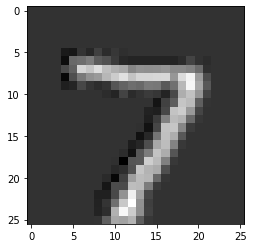

In [24]:
conv = Conv2D((28, 28,1), (3, 3), 1)
out = conv.forward(test.X[:1])
plot_img(out, shape=(26, 26))


### Check MaxPooling

In [31]:
pool = MaxPooling2D(size=2,stride=1)
out = pool.forward(test.X[:1])
plot_img(out, shape=(27, 27))


array([[[[0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        

Build the model

In [26]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(MaxPooling2D())
net.add(Flatten())
net.add(Dense(25*25*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

net.useLoss(cross_entropy, cross_entropy_prime)

Train the model

In [59]:
net.epochs = 1000
net.fit(train)

In [62]:
out = net.predict(test.X[0:20])
print("\n")
print("Predicted values:")
print(np.argmax(out,axis=1), end="\n")
print("True values:")
print(np.argmax(test.y[0:20],axis=1))



Predicted values:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 8 7 7 4 4]
True values:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [46]:
conv1 = net.layers[0]
act1 = net.layers[1]
pool1 = net.layers[2]

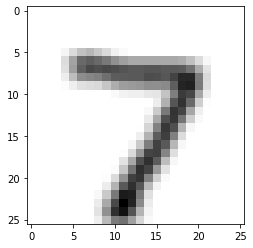

In [14]:
img1 = conv1.forward(test.X[:1])
plot_img(img1,shape=(26,26))


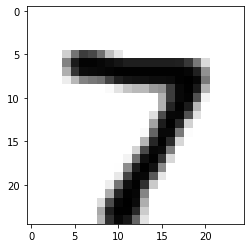

In [15]:
img2= pool1.forward(act1.forward(img1))
plot_img(img2,shape=(25,25))

In [33]:
a=np.arange(1,10).reshape(3,3)
d=np.array([a]).reshape(1,3,3,1)
d

array([[[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]]])

In [34]:
mp = MaxPooling2D()

In [35]:
mp.forward(d)

array([[[[5],
         [6]],

        [[8],
         [9]]]])

In [36]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])